# Feature Engineering

This notebook is to demonstrate the figures from the article and hoe to use our pipeline to process the dataset

## Data Processing

This function takes all the processed .csv data from a directory and formats it into a `pd.DataFrame`.

It applies the `transformations: list[callable]` in a functionnal manner.

```Python
ExperimentPipeline.get_data()
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ift6758.pipeline import ExperimentPipeline, DEFAULT_TRANSFORMATIONS

In [2]:
df = ExperimentPipeline.get_data(
    tabular_dir='../data/tabular',
    transformations=DEFAULT_TRANSFORMATIONS
)
df.head()

fetching dataframes from ../data/tabular
applying mirror_coordinates
applying append_shot_angle
applying append_shot_distance
applying replace_nan_by_0
applying append_game_secs
applying append_time_lapse_prev
applying append_dist_prev
applying append_rebound
applying append_angle_change
applying append_speed
applying replace_nan_by_0_2
done with preprocessing


,Unnamed: 0,game_starttime,game_endtime,game_id,datetime,offense_team_id,offense_team_name,offense_team_tricode,goal,x_coords,...,strength_powerplay,season,shot_angle,shot_distance,game_secs,time_lapsed_prev_event_in_seconds,dist_prev_event,rebound,angle_change,speed
0,0,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,0,2016-10-12T23:19:59Z,10,Toronto Maple Leafs,TOR,0,77.0,...,0.0,20162017,67.380135,13.000000,71,0,138.924440,False,0.0,-1.000000
1,1,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,0,2016-10-12T23:21:41Z,9,Ottawa Senators,OTT,0,86.0,...,0.0,20162017,12.994617,13.341664,173,0,36.715120,False,0.0,-1.000000
2,2,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,0,2016-10-12T23:23:17Z,9,Ottawa Senators,OTT,0,23.0,...,0.0,20162017,60.068488,76.157731,241,18,102.318131,False,0.0,5.684341
3,3,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,0,2016-10-12T23:24:02Z,9,Ottawa Senators,OTT,0,33.0,...,0.0,20162017,75.004921,57.974132,286,19,45.880279,False,0.0,2.414752
4,4,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,0,2016-10-12T23:27:30Z,10,Toronto Maple Leafs,TOR,0,34.0,...,0.0,20162017,63.019769,61.717096,406,15,63.348244,False,0.0,4.223216


## Report Plots

Plots used for the blogpost

In [3]:
is_goal = df['goal'].astype(bool)

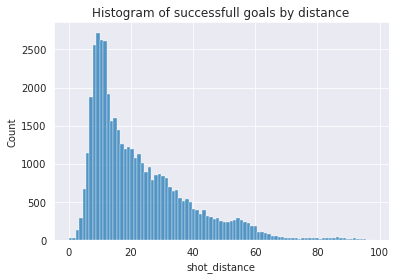

In [4]:
sns.histplot(df[is_goal], x='shot_distance')
plt.title('Histogram of successfull goals by distance')
plt.show()

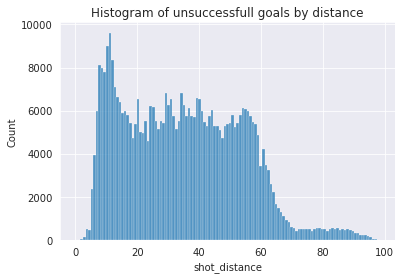

In [5]:
sns.histplot(df[~is_goal], x='shot_distance')
plt.title('Histogram of unsuccessfull goals by distance')
plt.show()

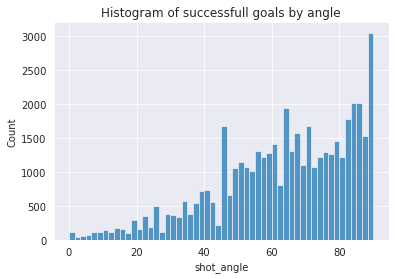

In [6]:
sns.histplot(df[is_goal], x='shot_angle')
plt.title('Histogram of successfull goals by angle')
plt.show()

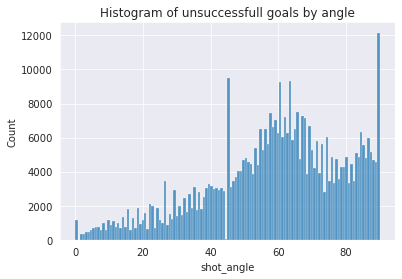

In [7]:
sns.histplot(df[~is_goal], x='shot_angle')
plt.title('Histogram of unsuccessfull goals by angle')
plt.show()

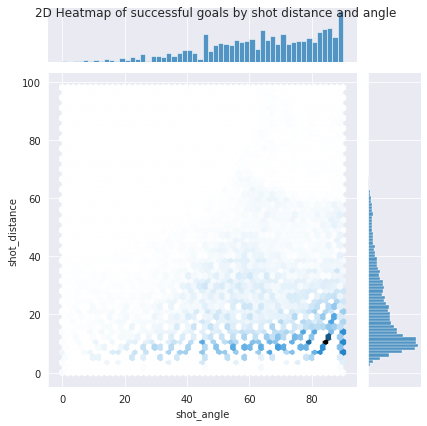

In [8]:
p =sns.jointplot(df[is_goal], x='shot_angle', y='shot_distance', kind='hex')
p.fig.suptitle("2D Heatmap of successful goals by shot distance and angle")
plt.show()

<AxesSubplot: title={'center': 'Successful shot rate by distance'}, xlabel='shot_distance', ylabel='Shot Rate'>

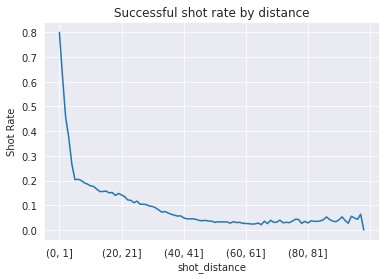

In [9]:
bins = pd.cut(df['shot_distance'], bins=np.arange(0, 100, 1))
goal_by_bins = df.groupby(bins).goal

success_rate = goal_by_bins.mean()
success_rate.plot(ylabel='Shot Rate', title='Successful shot rate by distance')

<AxesSubplot: title={'center': 'succcessful shot rate by angle'}, xlabel='shot_angle', ylabel='successful shot rate'>

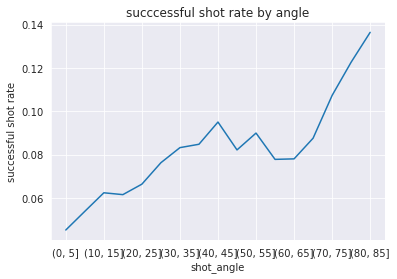

In [10]:
bins = pd.cut(df['shot_angle'], bins=np.arange(0, 90, 5))
goal_by_bins = df.groupby(bins).goal

success_rate = goal_by_bins.mean()
success_rate.plot(ylabel='successful shot rate', title='succcessful shot rate by angle')

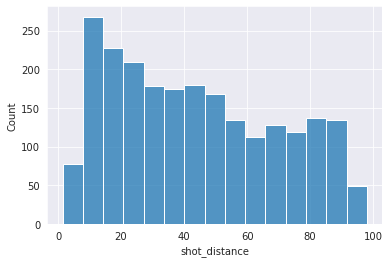

In [11]:
is_net_empty = df['empty_net'].astype(bool)
sns.histplot(df[is_goal & is_net_empty], x='shot_distance')
plt.show()

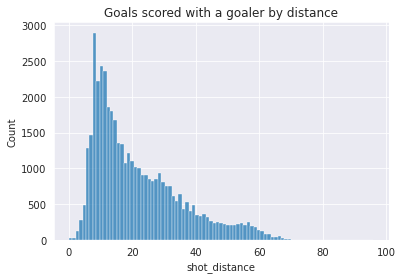

In [12]:
is_net_empty = df['empty_net'].astype(bool)
sns.histplot(df[is_goal & ~is_net_empty], x='shot_distance')
plt.title('Goals scored with a goaler by distance')
plt.show()